# Network Medicine

***Lucas Goiriz Beltrán***&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;*Instituto de Biología Integrativa y de Sistemas (I2SysBio, UV - CSIC) & Departamento de Matemática Aplicada (UPV)*

***Alberto Conejero Casares***&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;*Departamento de Matemática Aplicada (UPV)*

---------------------------------------------------------------------------------------------------------------------

## Ejemplo: Grafo de interacción Fármaco-Fármaco

En este ejemplo vamos a emplear [el siguiente](https://snap.stanford.edu/biodata/datasets/10001/10001-ChCh-Miner.html) conjunto de datos. Se trata de un grafo cuyos nodos son fármacos y las aristas representan una "*interacción*" entre fármacos. Se dice que existe una interacción entre dos fármacos si al administrarlos de forma conjunta, el paciente sufre de efectos inesperados.

Este ejemplo es más complicado que los contenidos de teoría y es meramente ilustrativo.

Las librerías a emplear son las siguientes:

In [ ]:
from urllib.request import urlopen # Para abrir urls
import gzip # Para descomprimir ficheros
from io import StringIO # Para alimentar el texto del fichero a funciones que leen ficheros
import pandas as pd # Para crear un `dataframe` (una tabla tipo excel)
import networkx as nx # Para crear y analizar el grafo
import netwulf as nw # Para visualizar el grafo de manera sencilla

Si no tenéis alguna de las librerías, podéis instalarla (cambiando `<librería>` por la librería en cuestión) mediante
- `conda`

In [ ]:
!conta install <librería>

- `pip`

In [ ]:
!pip install <librería>

***Nota importante***: `netwulf` no se encuentra en el repositorio de `conda`, así que para instalarlo tenéis que hacerlo a través de `pip`.

Primero tenemos que descargar los datos. Por cuestiones de estética, emplearemos un `dataframe` de `pandas` (que nos permite ver los datos de forma cómoda en el notebook).

In [2]:
# URL que contiene los datos a emplear
url = r"https://snap.stanford.edu/biodata/datasets/10001/files/ChCh-Miner_durgbank-chem-chem.tsv.gz"

# Función para leer enlaces de descarga de tsv gzip
def createDF(url):

    # Abrimos el fichero de la url 
    file = urlopen(url)

    # Lo leemos y descomprimimos
    fileUnzipped = gzip.decompress(file.read())
    
    # Decodificamos de binario a texto
    fileDecoded = fileUnzipped.decode("utf-8")
    
    # Creamos el data frame
    df = pd.read_csv(StringIO(fileDecoded), sep='\t', header=None)

    return df

# Crear data frame con nuestros datos
df = createDF(url); df

,0,1
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


Es sencillo ver que las filas de la tabla anterior representan las aristas mientras que las columnas son los nodos.

Vamos a crear un grafo a partir de estos datos. Como es un objeto `dataframe` de `pandas`, con tal de no entrar en conflicto con `networkx`, vamos a transformar la tabla en un iterador con tuplas, donde cada elemento es un nodo.

In [3]:
# Inicializar grafo vacío
G = nx.Graph()

# Añadir aristas
G.add_edges_from(
    df.apply( # Aplicamos al data frame ...
        lambda row: (row[0], row[1]), # una función que nos crea una tupla de dos elementos ...
        axis=1 # para cada fila
    )
)

Para llevar a cabo la visualización, emplearemos [`netwulf`](https://netwulf.readthedocs.io/en/latest/). Simplemente ejecutad la siguiente casilla para abrir una ventana donde podréis controlar manualmente los ajustes de la visualización. ¡No os olvidéis de darle a `export to python`! La próxima casilla es la que, mediante las variables generadas en la siguiente casilla, nos dibuja el grafo.

In [4]:
G_plot, G_config = nw.visualize(G, plot_in_cell_below=False)

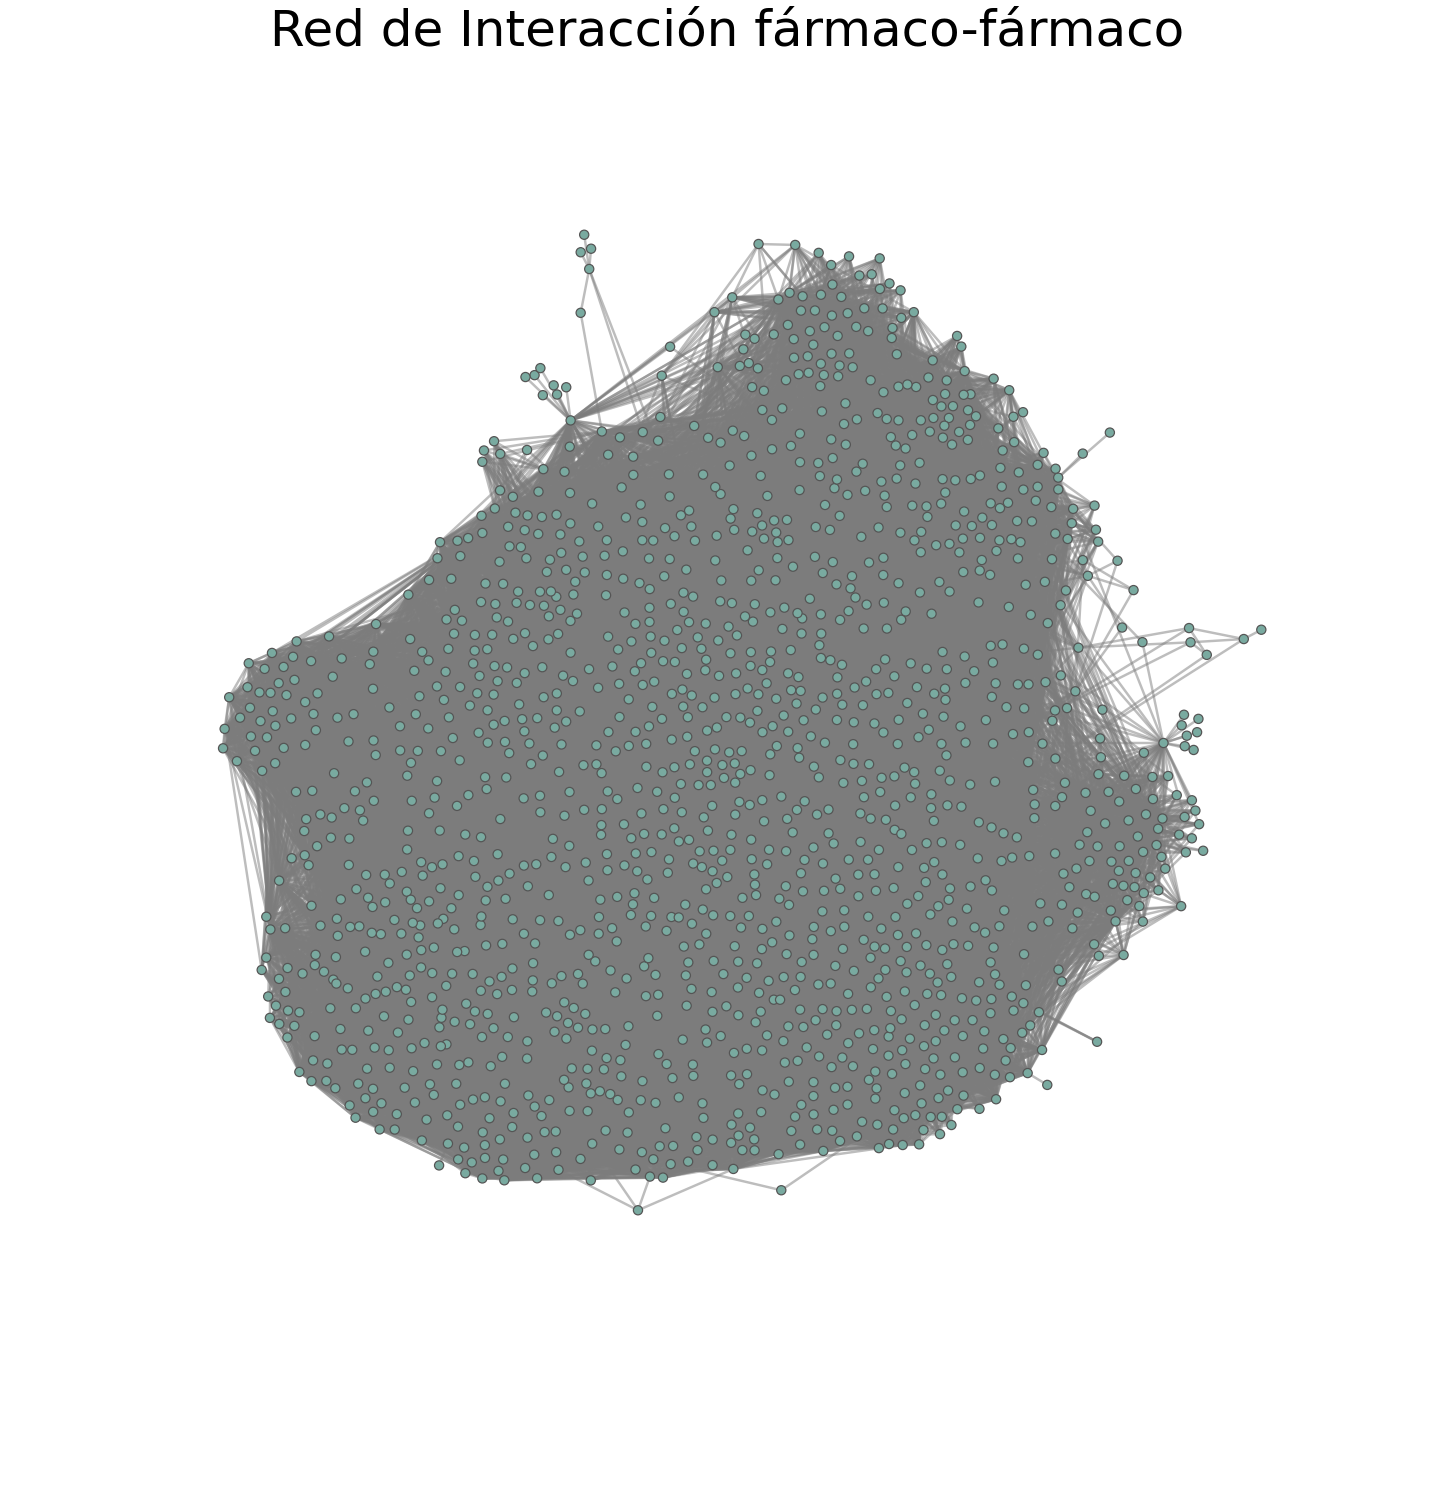

In [8]:
%matplotlib inline

fig, ax = nw.draw_netwulf(G_plot, figsize=20)
ax.set_title(
    "Red de Interacción fármaco-fármaco",
    fontdict={'fontsize':50}
);

Ahora que habéis jugado un poco con las opciones de visualización, sois libres aplicar las métricas que hemos estudiado a este grafo para conocer mejor su estructura